# Import Libraries


## Install TensorFlow 


In [4]:
# !pip install tensorflowjs

In [5]:
import tensorflow as tf
tf.__version__

2025-03-23 05:52:53.819183: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-23 05:52:53.819212: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-23 05:52:53.819243: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-23 05:52:53.826876: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-23 05:52:54.911120: W tensorflow/compiler/

'2.14.1'


## Import other libraries


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import pandas as pd
np.set_printoptions(precision=7)
#%matplotlib inline

import tensorflow_datasets as tfds
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from collections import Counter
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image

from PIL import Image


In [7]:
import tensorflow as tf
#import tensorflowjs as tfjs
import keras
#print("TensorFlow version:", tf.__version__)
#print("TensorFlow.js version:", tfjs.__version__)
print("Keras version:",keras.__version__)  # No need for tf-keras


Keras version: 2.14.0


## Create Directory for Dataset nad Saved Model

In [8]:
import os

data_dir = 'dataset'
saved_model_dir = 'saved_model'

# Check if the directories exist before trying to create them
if not os.path.exists(data_dir):
    os.mkdir(data_dir)
    print(f"Directory '{data_dir}' created.")
else:
    print(f"Directory '{data_dir}' already exists.")

if not os.path.exists(saved_model_dir):
    os.mkdir(saved_model_dir)
    print(f"Directory '{saved_model_dir}' created.")
else:
    print(f"Directory '{saved_model_dir}' already exists.")

Directory 'dataset' already exists.
Directory 'saved_model' already exists.


In [9]:
dataset_names = tfds.list_builders()

for name in dataset_names:
    print(name)

2025-03-23 05:52:57.077179: W tensorflow/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


abstract_reasoning
accentdb
aeslc
aflw2k3d
ag_news_subset
ai2_arc
ai2_arc_with_ir
ai2dcaption
aloha_mobile
amazon_us_reviews
anli
answer_equivalence
arc
asimov_dilemmas_auto_val
asimov_dilemmas_scifi_train
asimov_dilemmas_scifi_val
asimov_injury_val
asimov_multimodal_auto_val
asimov_multimodal_manual_val
asqa
asset
assin2
asu_table_top_converted_externally_to_rlds
austin_buds_dataset_converted_externally_to_rlds
austin_sailor_dataset_converted_externally_to_rlds
austin_sirius_dataset_converted_externally_to_rlds
bair_robot_pushing_small
bc_z
bccd
beans
bee_dataset
beir
berkeley_autolab_ur5
berkeley_cable_routing
berkeley_fanuc_manipulation
berkeley_gnm_cory_hall
berkeley_gnm_recon
berkeley_gnm_sac_son
berkeley_mvp_converted_externally_to_rlds
berkeley_rpt_converted_externally_to_rlds
big_patent
bigearthnet
billsum
binarized_mnist
binary_alpha_digits
ble_wind_field
blimp
booksum
bool_q
bot_adversarial_dialogue
bridge
bridge_data_msr
bucc
c4
c4_wsrs
caltech101
caltech_birds2010
caltech_b

In [10]:
#import tensorflow as tf
#print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


---
# TFDS Datasets


## Choose Dataset caltech101

In [11]:
dataset_name = "caltech101"


## Download Dataset


In [12]:

# Load the dataset and get dataset_info
# dataset, dataset_info = tfds.load(
#     name=dataset_name,
#     split=["train", "test"],
#     with_info=True,
#     data_dir=data_dir
# )

# # Access the train and test splits from the dictionary
# train_set = dataset[0]
# test_set = dataset[1]

In [13]:
import os
import tensorflow_datasets as tfds

# Check if the dataset is already downloaded
if not os.path.exists(os.path.join(data_dir, dataset_name)):
    print("Dataset not found, downloading...")
    # Download the dataset (only happens the first time)
    try:
        (train_set, test_set), dataset_info = tfds.load(
            name=dataset_name,
            split=["train", "test"],
            with_info=True,
            data_dir=data_dir
        )
        print("Dataset downloaded successfully.")
    except Exception as e:
        print(f"Error while downloading dataset: {e}")
else:
    print("Dataset already exists, loading...")
    # Load the dataset without downloading if already exists
    try:
        (train_set, test_set), dataset_info = tfds.load(
            name=dataset_name,
            split=["train", "test"],
            with_info=True,
            data_dir=data_dir
        )
        print("Dataset loaded successfully.")
    except Exception as e:
        print(f"Error while loading dataset: {e}")


Dataset already exists, loading...
Dataset loaded successfully.


2025-03-23 05:53:02.810039: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-23 05:53:02.836599: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## Dataset Information

In [14]:
print(dataset_info)

tfds.core.DatasetInfo(
    name='caltech101',
    full_name='caltech101/3.0.2',
    description="""
    Caltech-101 consists of pictures of objects belonging to 101 classes, plus one
    `background clutter` class. Each image is labelled with a single object. Each
    class contains roughly 40 to 800 images, totalling around 9k images. Images are
    of variable sizes, with typical edge lengths of 200-300 pixels. This version
    contains image-level labels only. The original dataset also contains bounding
    boxes.
    """,
    homepage='https://doi.org/10.22002/D1.20086',
    data_dir='dataset/caltech101/3.0.2',
    file_format=tfrecord,
    download_size=131.05 MiB,
    dataset_size=132.86 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/file_name': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=102),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
 

### Detailed Information

In [15]:
class_names =  dataset_info.features["label"].names

print('image shape    :', dataset_info.features['image'].shape)
print('image dtype    :', dataset_info.features['image'].dtype)
print()
print('num class      : ',dataset_info.features["label"].num_classes)
print('class label    :', dataset_info.features["label"].names)
print()
print('num train data :', dataset_info.splits["train"].num_examples)
print('num test data  :', dataset_info.splits["test"].num_examples)

image shape    : (None, None, 3)
image dtype    : <dtype: 'uint8'>

num class      :  102
class label    : ['accordion', 'airplanes', 'anchor', 'ant', 'background_google', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'faces', 'faces_easy', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'leopards', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'motorbikes', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid',

In [17]:
class_labels = dataset_info.features["label"].names
# Path to save the label file
labels_path = "saved_model/tflite/labels.txt"  # Specify the full path to the file

# Save the labels to the file
with open(labels_path, 'w') as f:
    for label in class_labels:
        f.write(f"{label}\n")

print(f"Labels saved to {labels_path}")


Labels saved to saved_model/tflite/labels.txt


## Show Images

2025-03-23 03:58:40.513727: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


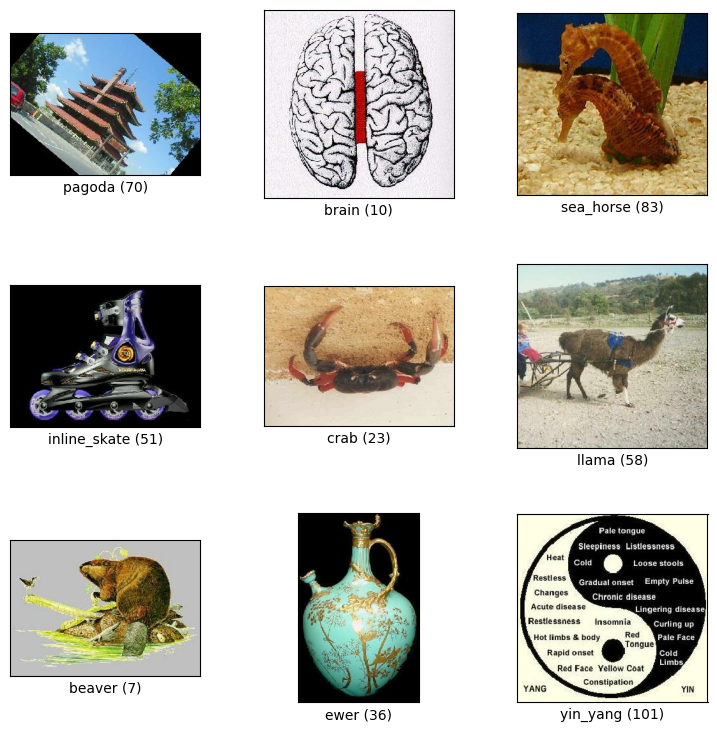

In [18]:
fig = tfds.show_examples(train_set, dataset_info)

# Preprocess Image

Convert and Resize Dataset to Numpy

In [19]:
input_shape = (120, 120, 3)

### Convert Data Train

In [20]:
X_train = []
y_train = []

for example in tfds.as_numpy(train_set):
    new_img = example['image']
    new_img = cv.resize(new_img, input_shape[:2],interpolation = cv.INTER_AREA)
    X_train.append(new_img)
    y_train.append(example['label'])

del train_set

In [21]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)

X_train.shape = (3060, 120, 120, 3)
y_train.shape = (3060,)


### Convert Data Test

In [22]:
X_test = []
y_test = []

for example in tfds.as_numpy(test_set):
    new_img = example['image']
    new_img = cv.resize(new_img, input_shape[:2],interpolation = cv.INTER_AREA)
    X_test.append(new_img)
    y_test.append(example['label'])

del test_set

In [23]:
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

print('X_test.shape =',X_test.shape)
print('y_test.shape =',y_test.shape)

X_test.shape = (6084, 120, 120, 3)
y_test.shape = (6084,)


## Split Data Train into Train and Val

In [24]:
X_val   = X_train[-300:]
y_val   = y_train[-300:]

X_train = X_train[:-300]
y_train = y_train[:-300]

In [25]:
print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)

print('\nX_val.shape  =',X_val.shape)
print('y_val.shape  =',y_val.shape)

print('\nX_test.shape  =',X_test.shape)
print('y_test.shape  =',y_test.shape)

X_train.shape = (2760, 120, 120, 3)
y_train.shape = (2760,)

X_val.shape  = (300, 120, 120, 3)
y_val.shape  = (300,)

X_test.shape  = (6084, 120, 120, 3)
y_test.shape  = (6084,)


# One hot y labels

In [26]:
y_train_hot = to_categorical(y_train, 102)
y_val_hot   = to_categorical(y_val, 102)
y_test_hot  = to_categorical(y_test, 102)

print('y_train_hot.shape =',y_train_hot.shape)
print('y_val_hot.shape   =',y_val_hot.shape)
print('y_test_hot.shape  =',y_test_hot.shape)

y_train_hot.shape = (2760, 102)
y_val_hot.shape   = (300, 102)
y_test_hot.shape  = (6084, 102)


---
# Classification Model

## Create Model

For Example in this program Using Sequential model

In [27]:
import os
os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'


In [29]:
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

# Load pre-trained ResNet50 model without the top classification layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(120, 120, 3))

# Freeze the layers of ResNet50 so they are not trained
base_model.trainable = False

# Build the model
myModel = models.Sequential()

# Add ResNet50 as a feature extractor
myModel.add(base_model)

# Global Average Pooling to reduce the spatial dimensions
myModel.add(layers.GlobalAveragePooling2D())

# Add fully connected layers with Dropout
myModel.add(layers.Dense(1024, activation='relu'))
# myModel.add(layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
myModel.add(layers.Dropout(0.5))

# Output layer for 102 classes
myModel.add(layers.Dense(102, activation='softmax'))

# Compile the model
myModel.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
# myModel.summary()


In [30]:

# # Output layer for 102 classes
# predictions = Dense(102, activation='softmax')(x)

# # Define the final model
# myModel = Model(inputs=input_layer, outputs=predictions)

## Visualize Model

In [31]:
myModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 102)               104550    
                                                                 
Total params: 25790438 (98.38 MB)
Trainable params: 2202726 (8.40 MB)
Non-trainable params: 23587712 (89.98 MB)
__________

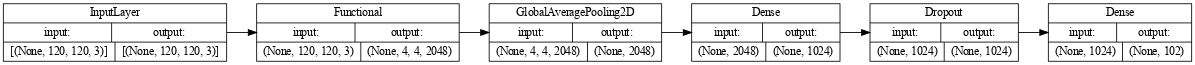

In [32]:
plot_model(myModel, show_shapes=True,
    show_layer_names=False,
    rankdir='LR',
    expand_nested=False,
    dpi=60
)

## Compile Model



In [33]:
myModel.compile(
      loss='categorical_crossentropy',
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )

---
# [Optional] Data Augmentation

In [34]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#     rotation_range=15,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.1,
#     zoom_range=0.1,
#     channel_shift_range=0.1,
#     horizontal_flip=True
# )

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# datagen.fit(train_data)

# [Optional] Callbacks
* Checkpoint
* Learning Rate Annealing
* etc, have fun

In [35]:


from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
import tensorflow as tf
#import tensorflowjs as tfjs
import os
# from google.colab import drive
# drive.flush_and_unmount()  # Unmount if it was already mounted
# drive.mount('/content/drive')  # Try remounting

saved_model_dir = 'saved_model'


def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 30:
        lr *= 0.001
    elif epoch > 20:
        lr *= 0.01
    return lr

lr_callback = LearningRateScheduler(lr_schedule)

myCheckpoint = ModelCheckpoint(filepath=os.path.join(saved_model_dir, 'my_model.h5'),
                               monitor='val_accuracy',
                               save_best_only=True)




# Train the Model

In [36]:
history_all = []

In [37]:
batch_size = 64
epochs = 25

In [34]:
augmented_train = datagen.flow(
    X_train, y_train_hot, batch_size
)

history = myModel.fit(
    augmented_train,
    validation_data=(X_val, y_val_hot),
    epochs=epochs,
    steps_per_epoch=len(X_train)//64,
    callbacks=[lr_callback, myCheckpoint],
    verbose=2)

history_all.append(history)

Epoch 1/25


/home/alnuco/python_env/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


43/43 - 58s - loss: 3.6004 - accuracy: 0.2604 - val_loss: 1.7287 - val_accuracy: 0.5667 - lr: 0.0010 - 58s/epoch - 1s/step
Epoch 2/25
43/43 - 82s - loss: 1.8070 - accuracy: 0.5519 - val_loss: 1.2127 - val_accuracy: 0.6733 - lr: 0.0010 - 82s/epoch - 2s/step
Epoch 3/25
43/43 - 77s - loss: 1.3235 - accuracy: 0.6606 - val_loss: 1.1693 - val_accuracy: 0.6900 - lr: 0.0010 - 77s/epoch - 2s/step
Epoch 4/25
43/43 - 78s - loss: 1.1913 - accuracy: 0.6806 - val_loss: 1.0836 - val_accuracy: 0.7033 - lr: 0.0010 - 78s/epoch - 2s/step
Epoch 5/25
43/43 - 62s - loss: 1.0298 - accuracy: 0.7129 - val_loss: 1.0838 - val_accuracy: 0.7200 - lr: 0.0010 - 62s/epoch - 1s/step
Epoch 6/25
43/43 - 62s - loss: 0.8994 - accuracy: 0.7548 - val_loss: 1.0251 - val_accuracy: 0.7233 - lr: 0.0010 - 62s/epoch - 1s/step
Epoch 7/25
43/43 - 61s - loss: 0.8227 - accuracy: 0.7730 - val_loss: 1.0301 - val_accuracy: 0.7367 - lr: 0.0010 - 61s/epoch - 1s/step
Epoch 8/25
43/43 - 61s - loss: 0.7288 - accuracy: 0.7919 - val_loss: 1.03

## Plot Current History Training

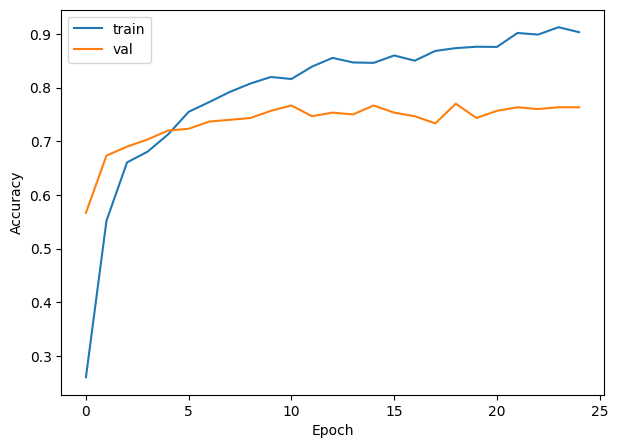

In [35]:
plt.rcParams['figure.figsize'] = [7, 5]

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



## Plot All History Training

In [36]:
hist_train = []
hist_val = []

for h in history_all:
    hist_train.append(h.history['accuracy'][1:])
    hist_val.append(h.history['val_accuracy'][1:])

In [37]:
hist_train = np.array(hist_train).reshape(-1)
hist_val = np.array(hist_val).reshape(-1)

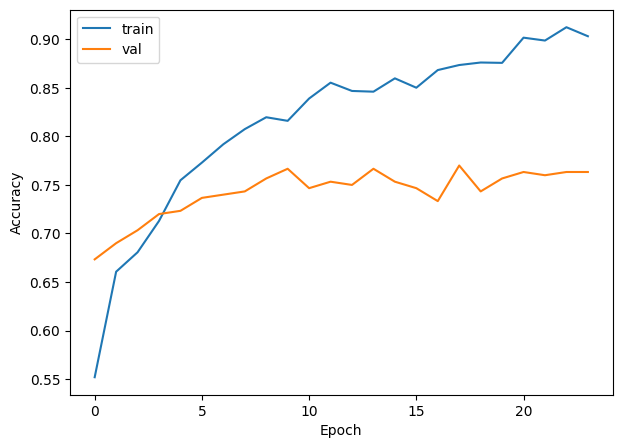

In [38]:
plt.rcParams['figure.figsize'] = [7, 5]

plt.plot(hist_train, label='train')
plt.plot(hist_val, label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



# Evaluate Model


In [38]:
myModel.load_weights(os.path.join(saved_model_dir, 'my_model.h5'))
scores = myModel.evaluate(X_test, y_test_hot)

191/191 [==============================] - 127s 658ms/step - loss: 0.9181 - accuracy: 0.7939


In [39]:
print('Test loss    :', scores[0])
print('Test accuracy: %.2f%%' % (scores[1]*100))

Test loss    : 0.9181394577026367
Test accuracy: 79.39%


---
# Save Model

### Save the model to TensorFlow Lite format


In [ ]:

import os
import tensorflow as tf
import tensorflowjs as tfjs
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler


# Load model weights
myModel.load_weights(os.path.join(saved_model_dir, 'my_model.h5'))

# 1. Save the model in the Keras format (.keras)
myModel.save(os.path.join(saved_model_dir, 'my_model.keras'))

# 2. Save the model in the TensorFlow SavedModel format
myModel.save(os.path.join(saved_model_dir, 'my_model_savedmodel'), save_format="tf")

# 3. Convert and save the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(myModel)
tflite_model = converter.convert()
with open(os.path.join(saved_model_dir, 'my_model.tflite'), 'wb') as f:
    f.write(tflite_model)

# 4. Convert and save the model to TensorFlow.js format
tfjs.converters.save_keras_model(myModel, os.path.join(saved_model_dir, 'tfjs_model'))


Saved artifact at '/content/drive/MyDrive/dicoding_saved_model/my_model_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 120, 120, 3), dtype=tf.float32, name='keras_tensor_175')
Output Type:
  TensorSpec(shape=(None, 102), dtype=tf.float32, name=None)
Captures:
  134252890394448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134252890395984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134252890395408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134252890393104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134252890397712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134252890396752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134252890391376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134253745404240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134253745403664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134253745403856: TensorSpec(sha

failed to lookup keras version from the file,
    this is likely a weight only file


In [41]:
myModel.load_weights(os.path.join(saved_model_dir, 'my_model.h5'))

# Re-Evaluate Model


In [42]:
train_scores = myModel.evaluate(X_train, y_train_hot)
test_scores  = myModel.evaluate(X_test, y_test_hot)
val_scores   = myModel.evaluate(X_val, y_val_hot)

10/10 [==============================] - 8s 798ms/step - loss: 0.9683 - accuracy: 0.7700


In [43]:
print('Train Loss: %.5f with Accuracy: %.1f%%' % (train_scores[0], (train_scores[1]*100)))
print('Test  Loss: %.5f with Accuracy: %.1f%%' % (test_scores[0], (test_scores[1]*100)))
print('Val   Loss: %.5f with Accuracy: %.1f%%' % (val_scores[0], (val_scores[1]*100)))

Train Loss: 0.06780 with Accuracy: 98.1%
Test  Loss: 0.91814 with Accuracy: 79.4%
Val   Loss: 0.96827 with Accuracy: 77.0%



# Make an inference test on an image from the internet then Predict using TFLITE Model

Please you can change to Any Animal or Object you want to Download Online

In [1]:
from tensorflow.keras.callbacks import LearningRateScheduler
import os
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt


2025-03-23 11:45:25.603789: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-23 11:45:25.603814: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-23 11:45:25.603839: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-23 11:45:25.611073: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-23 11:45:26.606952: W tensorflow/compiler/

In [2]:
!wget -O 'data_test_0.jpg' 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRyYZ9DDBErNqrF484eXA5B4EgwH5nT8Bhi_w&s'
!wget -O 'data_test_1.jpg' 'https://images.freeimages.com/images/large-previews/883/smiling-llama-1529215.jpg?fmt=webp&h=350'
!wget -O 'data_test_2.jpg' 'https://th.bing.com/th/id/OIP.mCgUxdBEfECvh43WhuqYbwHaE6?w=274&h=182&c=7&r=0&o=5&dpr=1.3&pid=1.7'
!wget -O 'data_test_3.jpg' 'https://www.oist.jp/sites/default/files/styles/background_image_xl_1x/public/2024-07/Lglry1b9.jpeg?h=3fa38beb&itok=kHkth1o8'
!wget -O 'data_test_4.jpg' 'https://th.bing.com/th/id/OIP.ucLpB-LS0XFz1vf_Ec4iWgHaJD?w=170&h=206&c=7&r=0&o=5&pid=1.7'

--2025-03-23 11:45:45--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRyYZ9DDBErNqrF484eXA5B4EgwH5nT8Bhi_w&s
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 142.251.175.138, 142.251.175.100, 142.251.175.113, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|142.251.175.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6612 (6.5K) [image/jpeg]
Saving to: ‘data_test_0.jpg’

data_test_0.jpg     100%[===================>]   6.46K  --.-KB/s    in 0.001s  

2025-03-23 11:45:45 (9.67 MB/s) - ‘data_test_0.jpg’ saved [6612/6612]

--2025-03-23 11:45:45--  https://images.freeimages.com/images/large-previews/883/smiling-llama-1529215.jpg?fmt=webp&h=350
Resolving images.freeimages.com (images.freeimages.com)... 3.165.102.4, 3.165.102.94, 3.165.102.55, ...
Connecting to images.freeimages.com (images.freeimages.com)|3.165.102.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57388 (56K) [image/

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


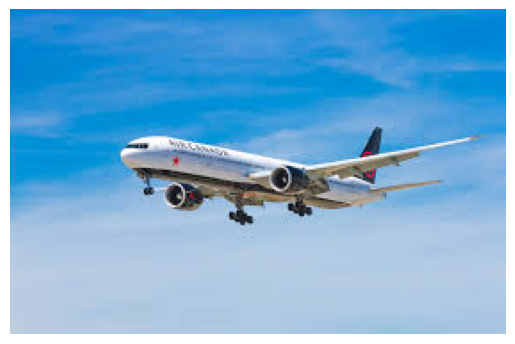

Predicted ID: 1
Class prediction: airplanes
Confidence: 0.9990


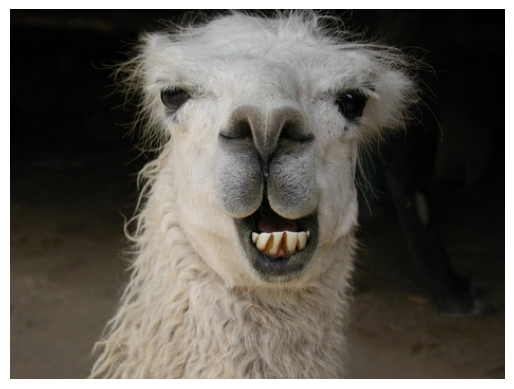

Predicted ID: 58
Class prediction: llama
Confidence: 0.6056


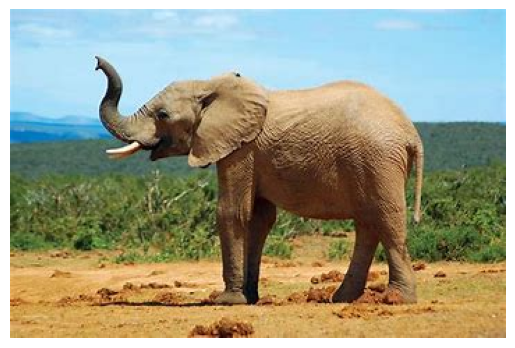

Predicted ID: 33
Class prediction: elephant
Confidence: 0.9950


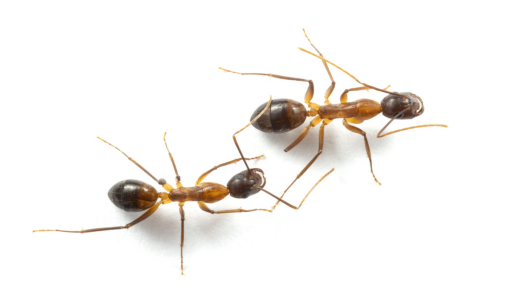

Predicted ID: 3
Class prediction: ant
Confidence: 1.0000


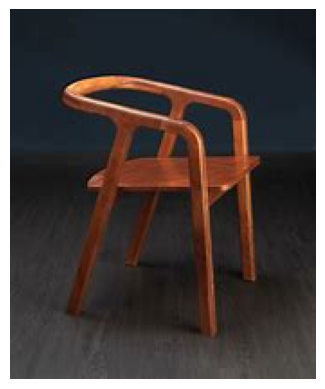

Predicted ID: 99
Class prediction: windsor_chair
Confidence: 0.4467


In [3]:

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path='tflite/my_model.tflite')
interpreter.allocate_tensors()

# Load labels from labels.txt
with open('tflite/labels.txt', 'r') as f:
    labels = [line.strip() for line in f.readlines()]

# Get input and output tensor details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Define the input shape (assuming the model expects 120x120 RGB images)
input_shape = (120, 120, 3)

# Function to preprocess and make predictions with the TFLite model
def predict_with_tflite(img):
    # Resize image to match model's input shape
    img = cv2.resize(img, input_shape[:2], interpolation=cv2.INTER_AREA)
    
    # Ensure the image is in float32 and in range [0, 255] (no normalization)
    img = img.astype(np.float32)
    
    # Expand the image dimensions to include batch size (1)
    img = np.expand_dims(img, axis=0)
    
    # Set the input tensor
    interpreter.set_tensor(input_details[0]['index'], img)
    
    # Run inference
    interpreter.invoke()
    
    # Get the output tensor
    pred = interpreter.get_tensor(output_details[0]['index'])
    
    # Get the predicted class ID and the associated class label
    class_id = np.argmax(pred)
    class_name = labels[class_id]
    
    return {
        'class_id': class_id,
        'class_name': class_name,
        'confidence': float(pred[0][class_id])
    }

# Test the model on example images
for i in range(5):
    try:
        # Load and preprocess image
        new_img = Image.open(f'data_test_{i}.jpg')
        new_img = np.array(new_img)
        
        # Display image
        plt.imshow(new_img)
        plt.axis('off')
        plt.show()

        # Use TFLite model for prediction
        result = predict_with_tflite(new_img)
        
        # Print results
        print(f"Predicted ID: {result['class_id']}")
        print(f"Class prediction: {result['class_name']}")
        print(f"Confidence: {result['confidence']:.4f}")
        
    except Exception as e:
        print(f"Error processing image {i}: {str(e)}")
